In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
data_root = '/kellogg/proj/hpk5609/Mentions/'

In [3]:
top_eth = [
 'SouthernEuropean',
 'WesternNorthernEuropean',
 'EasternEuropean',
 'EastAsian',
 'Chinese',
 'MiddleEastern',
 'Indian',
 'African'
]


ylabels = [
 #'English',
 'Woman',
 'Southern European',
 'Western & Northern Euro.',
 'Eastern European',
 'non-Chinese East Asian',
 'Chinese',
 'Middle Eastern',
 'Indian',
 'African']

cols = ["author_gender_ethneaF"] + ["author_eth_ethnea_broad" + eth for eth in top_eth]

### Fig 3

In [4]:
cates = [
    'PressRelease',
    'SciTech',
    'General'
]

re_cates = [
    'Press Releases',
    'Sci. & Tech.',
    'General News'
]

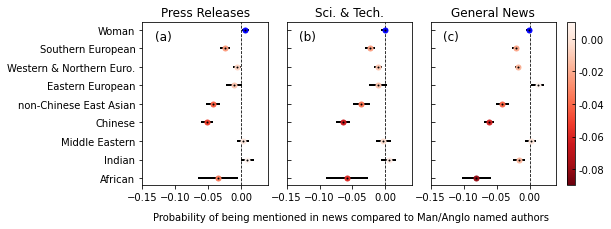

In [5]:
nrows = 1
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9.5, 3), sharex=True)

s = 4 # markersize
lw = 1.5 # linewidth
subs = ['(a)', '(b)', '(c)']

all_xs = []
for cate in cates:    
    df = pd.read_csv(data_root + 'reg_results/news_type/%s_margins.csv'%cate, header=0, index_col='factor')
    df = df.loc[df.index.isin(cols)]
    df = df.reindex(cols)
    xs = df['AME'].values
    all_xs.extend(xs)
all_xs = np.array(all_xs)
# norm = matplotlib.colors.Normalize(vmin=min(all_xs), vmax=max(all_xs))
norm = matplotlib.colors.Normalize(vmin=-0.09, vmax=0.01)
mapper = cm.ScalarMappable(norm=norm, cmap='Reds_r')

for pos, cate in enumerate(cates):
    j = pos%ncols
    ax = axes[j]
    df = pd.read_csv(data_root + 'reg_results/news_type/%s_margins.csv'%cate, header=0, index_col='factor')
    df = df.loc[df.index.isin(cols)]
    df = df.reindex(cols)
    xs = df['AME'].values
    confs = (df['upper'] - df['AME']).values
    
    # ax.errorbar(xs[::-1], ylabels[::-1], xerr=confs[::-1], fmt='bo', markersize=s, linewidth=lw, fillstyle='full')
    ax.errorbar(xs[::-1], ylabels[::-1], xerr=confs[::-1], color='k', fmt='.', markersize=2, linewidth=2)
    ax.axvline(0, color='k', linestyle='--', linewidth = 0.8)
    ax.set_title(re_cates[pos])
    ax.text(0.1, 0.95, subs[pos], fontsize=12, ha='left', va='top', transform=ax.transAxes)
    if j != 0:
        ax.set_yticklabels([])
        ax.tick_params(axis='y', direction='in')
        
    # draw dots
    xcols = np.array([(mapper.to_rgba(v)) for v in xs])
    for x, ylab, coll in zip(xs, ylabels, xcols):
        if ylab == 'Woman':
            ax.plot([x], [ylab], color='b', marker='o', markersize=5)
        else:
            ax.plot([x], [ylab], color=coll, marker='o', markersize=5)

fig.subplots_adjust(wspace=0.15)

cbar = fig.colorbar(mapper, ax=axes.ravel().tolist(), fraction=0.2, pad=0.02)#, format="%0.2f")
# cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
cbar.ax.tick_params(axis='y', direction='in')
# cbar.ax.set_xlim(-0.05, 0)
cbar.set_ticks([-0.08, -0.06, -0.04, -0.02, 0])
cbar.set_ticklabels(['-0.08', '-0.06', '-0.04', '-0.02', ' 0.00'])

plt.xlim([-0.15, 0.04])
fig.text(0.43, -0.02, 'Probability of being mentioned in news compared to Man/Anglo named authors', ha='center', va='center')
plt.show()
fig.savefig(data_root+'fig_three.pdf', bbox_inches='tight', pad_inches=0.01)

### Fig 4

In [9]:
groups = [
 'M',
 'F',
 'English',
 'SouthernEuropean',
 'WesternNorthernEuropean',
 'EastEurope',
 'Asia',
 'Chinese',
 'MiddleEast',
 'Indian']
#  'Africa']

labels = [
 'Man',
 'Woman',
 'Anglo',
 'Southern European',
 'Western & Northern Euro.',
 'Eastern European',
 'non-Chinese East Asian',
 'Chinese',
 'Middle Eastern',
 'Indian']
#  'African']

In [10]:
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
            self.format = r'$\mathdefault{%s}$'%self.format

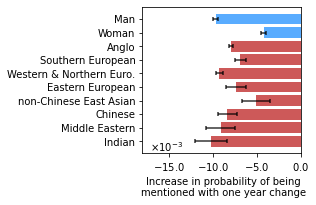

In [11]:
nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4.5, 2.6))

s = 5 # markersize
lw = 1.5 # linewidth

ypos = np.arange(len(labels))[::-1]
xs, errs = [], []

for group in groups:
    df = pd.read_csv(data_root + 'reg_results/year/margins_one_year_change/%s_margins.csv'%group, header=0, index_col='factor')
    x = df['AME'].values[0]
    conf = (df['upper'] - df['AME']).values[0]
    xs.append(x)
    errs.append(conf)

xs = np.array(xs)
errs = np.array(errs)

ax.barh(ypos[:2], xs[:2], xerr=errs[:2], color = '#0080ff', alpha = 0.65, error_kw=dict(lw=2, capsize=2, capthick=2, alpha=0.6))
ax.barh(ypos[2:], xs[2:], xerr=errs[2:], color = '#b30000', alpha = 0.65, error_kw=dict(lw=2, capsize=2, capthick=2, alpha=0.6))
ax.axvline(0, color='k', linestyle='--', linewidth = 0.8)

ax.set_yticks(ypos)
ax.set_yticklabels(labels)
ax.set_xlim(-0.018, 0)
ax.get_xaxis().set_major_formatter(OOMFormatter(-3, "%1.1f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0), useMathText=True)
ax.get_xaxis().get_offset_text().set_visible(False)
ax.annotate(r'$\times10^{%i}$'%(-3), xy=(.05, .01), xycoords='axes fraction')


# for i, t in enumerate(ax.yaxis.get_ticklabels()):
#     if i >= 3:
#         col = colors[i-3]
#         t.set_color(col)
#         t.set_fontweight("bold")
# ax.tick_params(axis='y', labelsize=10)

fig.text(0.7, -0.02, 'Increase in probability of being\nmentioned with one year change', ha='center', va='center')
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.show()
fig.savefig(data_root+'fig_four.pdf', bbox_inches='tight', pad_inches=0.04)

In [52]:
errs

array([0.00026152, 0.00032999, 0.00027567, 0.00059786, 0.00042945,
       0.00114292, 0.00161065, 0.00108297, 0.00166552, 0.00181057])

In [21]:
for x, ylab in zip(xs, labels):
    print(ylab, x)

Male -0.009705166687071
Female -0.004249568805384
British-origin -0.0079435450667843
Southern European -0.0068750424174845
Western & Northern Euro. -0.0092630436404291
Eastern European -0.007421800505568
non-Chinese East Asian -0.0051116970320967
Chinese -0.0083926779326728
Middle Eastern -0.0091360323809991
Indian -0.0102157128372496


In [22]:
xs_year_delta = xs[3:].copy()

In [23]:
len(xs_year_delta)

7

In [24]:
eng = xs[2]

In [25]:
eng

-0.0079435450667843

In [28]:
df = pd.read_csv(data_root + 'reg_results/reg_table/big_mfx_table_R_margins.csv', header=0, index_col='factor')
df = df.loc[df.index.isin(cols)]
df = df.reindex(cols)
xs_abs_diff = df['AME'].values

In [29]:
for eth, year_delta, abss in zip(ylabels[1:-1], xs_year_delta, xs_abs_diff[1:-1]):
    print(eth, -1*abss/(year_delta-eng))

Southern European 20.61783894394862
Western & Northern Euro. -8.775054031414962
Eastern European 2.830822307808193
non-Chinese East Asian 15.310430290141959
Chinese -132.97426808394624
Middle Eastern 2.0984304136610343
Indian -0.7864325166197887
